In [4]:
import numpy as np
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [5]:
data = pd.read_csv("datasetGold.csv",index_col = "Date", parse_dates = True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,1155.2,1160.8,1146.5,1160.4,1160.4,52
2017-01-04,1156.3,1165.0,1156.3,1163.8,1163.8,36
2017-01-05,1172.0,1183.3,1171.5,1179.7,1179.7,500
2017-01-06,1176.5,1176.5,1171.9,1171.9,1171.9,16
2017-01-09,1173.9,1183.6,1173.0,1183.5,1183.5,62


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1236 non-null   float64
 1   High       1236 non-null   float64
 2   Low        1236 non-null   float64
 3   Close      1236 non-null   float64
 4   Adj Close  1236 non-null   float64
 5   Volume     1236 non-null   object 
dtypes: float64(5), object(1)
memory usage: 67.6+ KB


In [7]:
len(data)

1236

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1236 non-null   float64
 1   High       1236 non-null   float64
 2   Low        1236 non-null   float64
 3   Close      1236 non-null   float64
 4   Adj Close  1236 non-null   float64
 5   Volume     1236 non-null   object 
dtypes: float64(5), object(1)
memory usage: 67.6+ KB


In [9]:
data1=pd.DataFrame(data,columns=['Date','Close'])
data1.index=data1.Date
data1.drop('Date',axis=1,inplace=True)

In [10]:
dataset = data1.values
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(dataset)
trainData.shape

(1236, 1)

In [11]:
train_size = int(np.ceil(len(dataset) * 0.8))
train = trainData[0:int(train_size),:]
len(train)

989

In [12]:
train

array([[0.        ],
       [0.00381551],
       [0.02165862],
       [0.0129054 ],
       [0.02592302],
       [0.02670856],
       [0.03950174],
       [0.04320503],
       [0.03916508],
       [0.05790596],
       [0.05712041],
       [0.04544944],
       [0.04926495],
       [0.06127258],
       [0.0559982 ],
       [0.04140949],
       [0.03265627],
       [0.03108518],
       [0.03680844],
       [0.05409045],
       [0.05072382],
       [0.06318034],
       [0.06520031],
       [0.07810571],
       [0.08281899],
       [0.0866345 ],
       [0.08382898],
       [0.08304343],
       [0.07182134],
       [0.07126024],
       [0.08001347],
       [0.0893278 ],
       [0.0866345 ],
       [0.08652228],
       [0.08035013],
       [0.10077432],
       [0.10829312],
       [0.10885423],
       [0.10346762],
       [0.09931545],
       [0.08023791],
       [0.07305577],
       [0.07193357],
       [0.06138481],
       [0.05397823],
       [0.04713276],
       [0.045225  ],
       [0.047

In [13]:
#Create x_train and y_train
X_train = []
y_train = []
for i in range (60,len(train)): #60 : timestep // len(train)) : length of train
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(929, 60, 1)

In [14]:
model = Sequential()

model.add(LSTM(units=128, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=128, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=128, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [15]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
30/30 - 18s - loss: 0.0175 - 18s/epoch - 612ms/step
Epoch 2/20
30/30 - 4s - loss: 0.0042 - 4s/epoch - 132ms/step
Epoch 3/20
30/30 - 3s - loss: 0.0038 - 3s/epoch - 116ms/step
Epoch 4/20
30/30 - 5s - loss: 0.0033 - 5s/epoch - 158ms/step
Epoch 5/20
30/30 - 4s - loss: 0.0030 - 4s/epoch - 144ms/step
Epoch 6/20
30/30 - 4s - loss: 0.0042 - 4s/epoch - 144ms/step
Epoch 7/20
30/30 - 4s - loss: 0.0032 - 4s/epoch - 147ms/step
Epoch 8/20
30/30 - 5s - loss: 0.0030 - 5s/epoch - 157ms/step
Epoch 9/20
30/30 - 4s - loss: 0.0028 - 4s/epoch - 138ms/step
Epoch 10/20
30/30 - 4s - loss: 0.0028 - 4s/epoch - 147ms/step
Epoch 11/20
30/30 - 5s - loss: 0.0025 - 5s/epoch - 151ms/step
Epoch 12/20
30/30 - 5s - loss: 0.0026 - 5s/epoch - 151ms/step
Epoch 13/20
30/30 - 4s - loss: 0.0045 - 4s/epoch - 144ms/step
Epoch 14/20
30/30 - 5s - loss: 0.0083 - 5s/epoch - 153ms/step
Epoch 15/20
30/30 - 5s - loss: 0.0027 - 5s/epoch - 151ms/step
Epoch 16/20
30/30 - 5s - loss: 0.0044 - 5s/epoch - 153ms/step
Epoch 17/20
30/

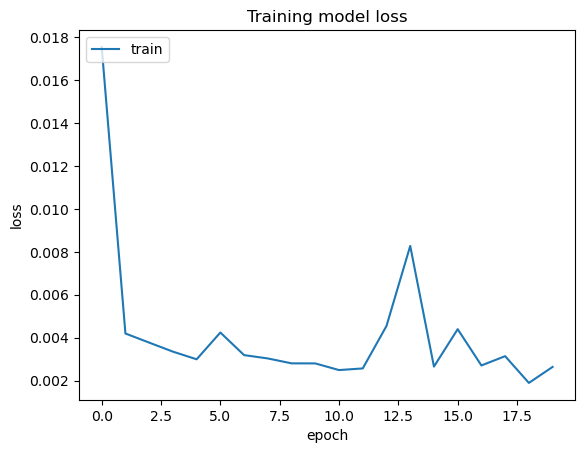

In [16]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
test = trainData[train_size - 60: , :]
#Create x_test and y_test
x_test = []
y_test = dataset[train_size: , :]
for i in range(60, len(test)):
  x_test.append(test[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


#Get the models predicted price values
predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

8/8 [==============================] - 3s 53ms/step


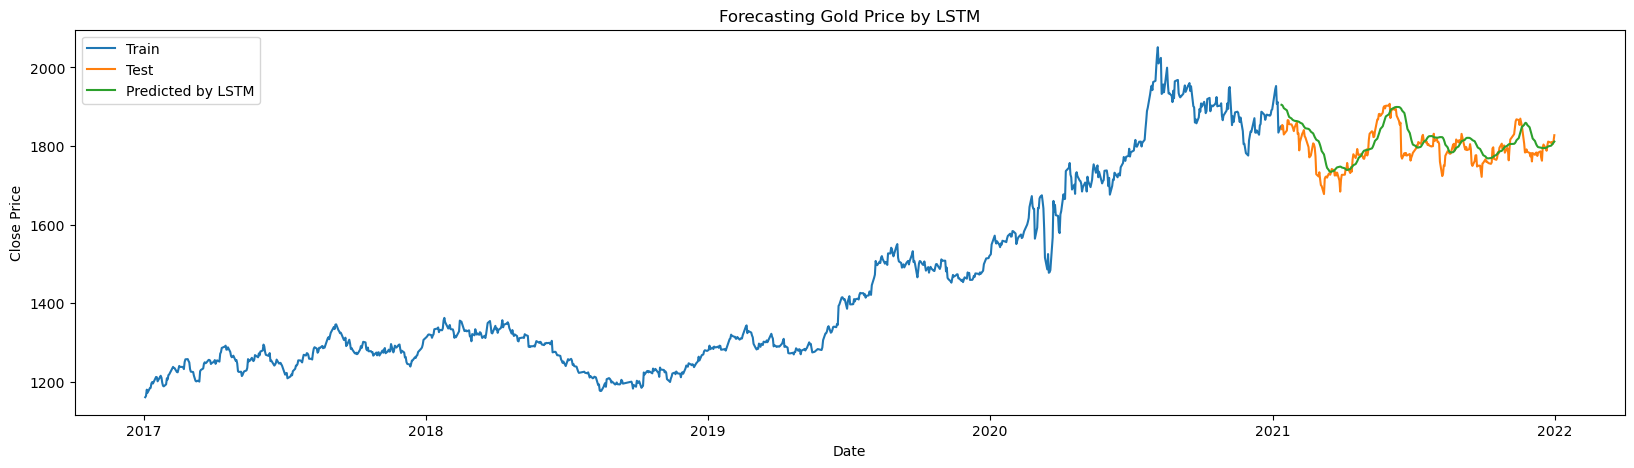

In [18]:
pd.options.mode.chained_assignment = None 
#Plot the data
train1 = data[:train_size]
test1 =  data[train_size:]
test1['Predictions'] = predicted_price
#Visualisze the data
plt.figure(figsize = (20,5))
plt.title("Forecasting Gold Price by LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train1['Close'])
plt.plot(test1[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predicted by LSTM'], loc = 'upper left')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
mse =  mean_squared_error(y_test, predicted_price)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predicted_price)
print("RMSE: ", rmse)
print("MAPE: ", mape * 100)

RMSE:  38.37400094144668
MAPE:  1.6148178439367313
